# 2021 Heart Attack Analysis
### By: Varun Arvind

## Imports

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  plot_confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



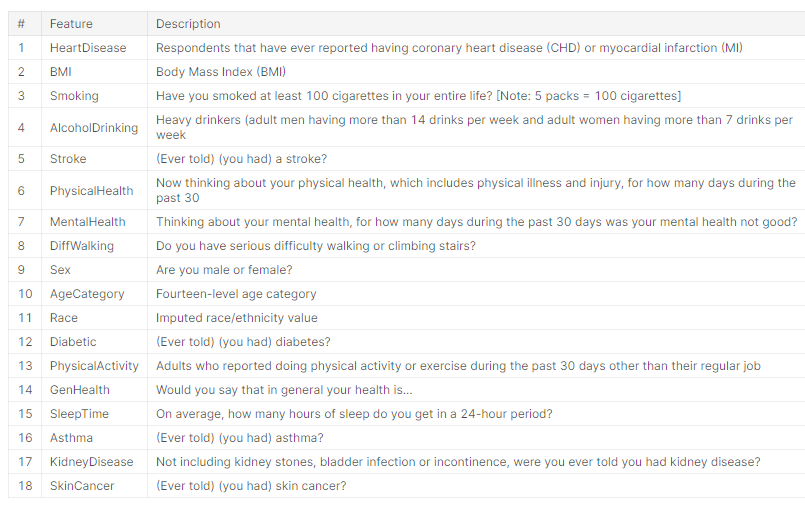

# Load in Dataset

In [189]:
brfss_2020_dataset = pd.read_csv('2020.csv')

# Preprocessing/Feature Engineering

In [190]:
# 1 is yes, 0 is no
brfss_2020_dataset.HeartDisease.replace(('Yes','No'), (1,0), inplace = True)


In [191]:
# 1 is yes, 0 is no
brfss_2020_dataset.AlcoholDrinking.replace(('Yes','No'), (1,0), inplace = True)


In [192]:
# 1 is yes, 0 is no
brfss_2020_dataset.Smoking.replace(('Yes','No'), (1,0), inplace = True)


In [193]:
# 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
brfss_2020_dataset.Diabetic.replace(('Yes','No','No, borderline diabetes','Yes (during pregnancy)'), (2,0,1,0), inplace = True)


In [194]:
# 1 for difficulty walking, 0 for no difficulty walking
brfss_2020_dataset.DiffWalking.replace(('Yes','No'), (1,0), inplace =True)


In [195]:
# 1 for stroke, 0 for stroke
brfss_2020_dataset.Stroke.replace(('Yes','No'), (1,0), inplace = True)


In [196]:
# 1 for physical activity, 0 for no physical activity
brfss_2020_dataset.PhysicalActivity.replace(('Yes','No'), (1,0), inplace = True)


In [197]:
#GENHLTH
# (1 is Excellent -> 5 is Poor)
brfss_2020_dataset.GenHealth.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (1,2,3,4,5), inplace = True)


In [198]:
# 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
brfss_2020_dataset.AgeCategory.replace(('18-24','25-29','30-34','35-39','40-44','45-49','50-54',
                          '55-59','60-64','65-69','70-74','75-79','80 or older'),
                         (1,2,3,4,5,6,7,8,9,10,11,12,13), inplace = True)


In [199]:
# change Female to 0. Male is 1
brfss_2020_dataset.Sex.replace(('Male','Female'), (1,0), inplace = True)


In [201]:
brfss = brfss_2020_dataset.rename(columns = {'HeartDisease':'HeartDiseaseorAttack', 
                                         'AlcoholDrinking':'HvyAlcoholConsump', 
                                         'MentalHealth':'MentHlth', 'PhysicalHealth':'PhysHlth', 'DiffWalking':'DiffWalk', 
                                          'AgeCategory':'Age', 'PhysicalActivity':'PhysActivity',
                                            'Smoking': 'Smoker', 'Diabetic': 'Diabetes', 'GenHealth': 'GenHlth'})

In [150]:
brfss_ml_2020 = brfss[['HeartDiseaseorAttack', 'BMI', 'Smoker', 'HvyAlcoholConsump', 'Stroke', 'PhysHlth','GenHlth', 'MentHlth', 'DiffWalk', 'Sex', 'Age', 'PhysActivity', 'Diabetes']]

In [151]:
brfss_ml_2020

,HeartDiseaseorAttack,BMI,Smoker,HvyAlcoholConsump,Stroke,PhysHlth,GenHlth,MentHlth,DiffWalk,Sex,Age,PhysActivity,Diabetes
0,0,16.60,1,0,0,3.0,2,30.0,0,0,8,1,2
1,0,20.34,0,0,1,0.0,2,0.0,0,0,13,1,0
2,0,26.58,1,0,0,20.0,4,30.0,0,1,10,1,2
3,0,24.21,0,0,0,0.0,3,0.0,0,0,12,0,0
4,0,23.71,0,0,0,28.0,2,0.0,1,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,4,0.0,1,1,9,0,2
319791,0,29.84,1,0,0,0.0,2,0.0,0,1,4,1,0
319792,0,24.24,0,0,0,0.0,3,0.0,0,0,6,1,0
319793,0,32.81,0,0,0,0.0,3,0.0,0,0,2,0,0


# EDA

## Correlation/Heatmap

In [152]:
brfss_ml_2020.corr()

,HeartDiseaseorAttack,BMI,Smoker,HvyAlcoholConsump,Stroke,PhysHlth,GenHlth,MentHlth,DiffWalk,Sex,Age,PhysActivity,Diabetes
HeartDiseaseorAttack,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.243182,0.028591,0.201258,0.070040,0.233432,-0.100030,0.184519
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.230720,0.064131,0.181678,0.026940,-0.004744,-0.150616,0.211774
Smoker,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.174717,0.085157,0.120074,0.085052,0.128331,-0.097174,0.059318
HvyAlcoholConsump,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,-0.029780,0.051282,-0.035328,0.004200,-0.059528,0.017487,-0.059313
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.168090,0.046467,0.174143,-0.003091,0.137822,-0.079455,0.109603
PhysHlth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.482697,0.287987,0.428373,-0.040904,0.110763,-0.232283,0.161049
GenHlth,0.243182,0.230720,0.174717,-0.029780,0.168090,0.482697,1.000000,0.241625,0.413797,-0.025947,0.188381,-0.281249,0.284155
MentHlth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,0.241625,1.000000,0.152235,-0.100058,-0.155506,-0.095808,0.027562
DiffWalk,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.413797,0.152235,1.000000,-0.068860,0.243263,-0.278524,0.221029
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.025947,-0.100058,-0.068860,1.000000,-0.067478,0.048247,0.019574


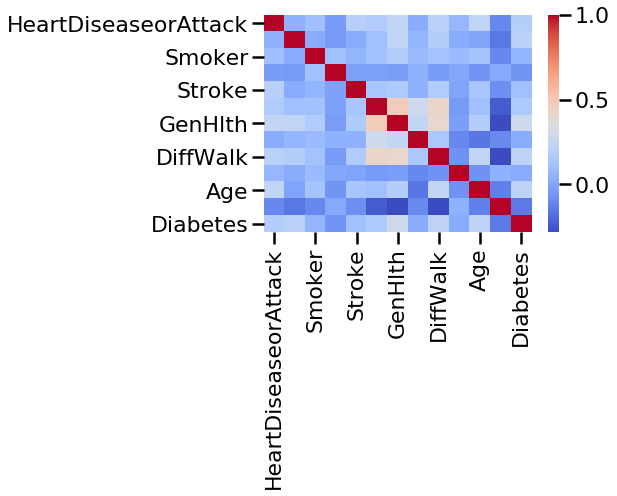

In [153]:
sns.heatmap(brfss_ml_2020.corr(), cmap='coolwarm')

## Age

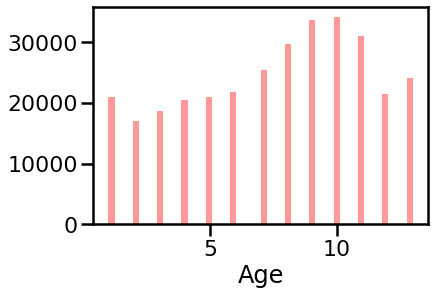

In [154]:
sns.distplot(brfss_ml_2020['Age'], kde=False, color='red')

## Sex / Smoker

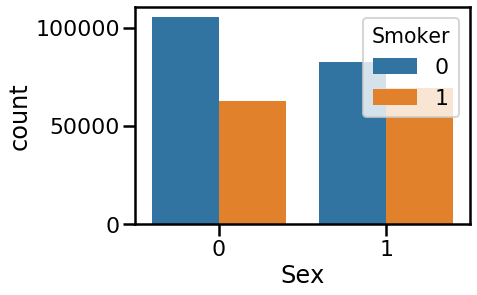

In [155]:
sns.countplot(x='Sex', data=brfss_ml_2020, hue='Smoker')

## Smoking / HDA

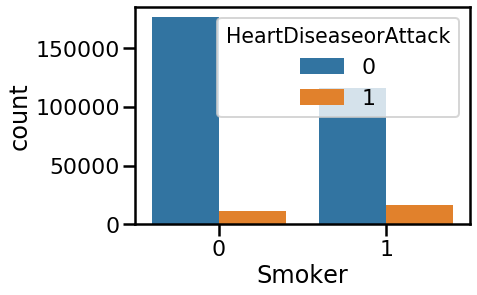

In [156]:
sns.countplot(x='Smoker', data=brfss_ml_2020, hue='HeartDiseaseorAttack')

## Smoking/Diabetes

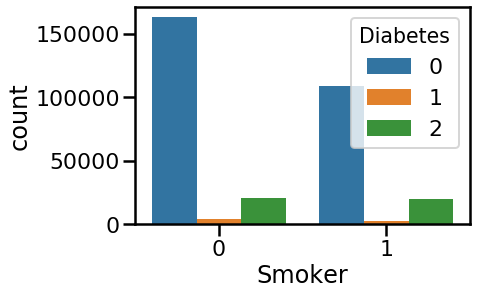

In [157]:
sns.countplot(x='Smoker', data=brfss_ml_2020, hue='Diabetes')

## Smoking / Stroke

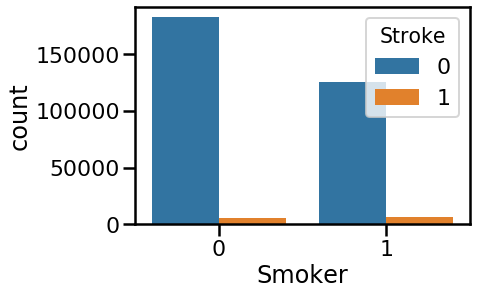

In [158]:
sns.countplot(x='Smoker', data=brfss_ml_2020, hue='Stroke')

## Diabetes / Sex

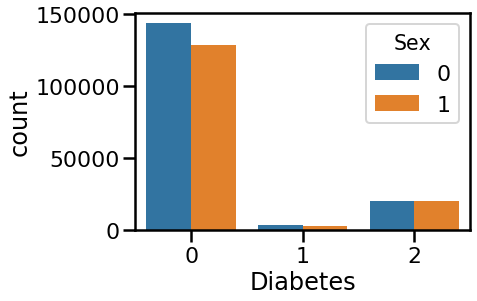

In [159]:
sns.countplot(x='Diabetes', data=brfss_ml_2020, hue='Sex')

## Physical Activity / Sex

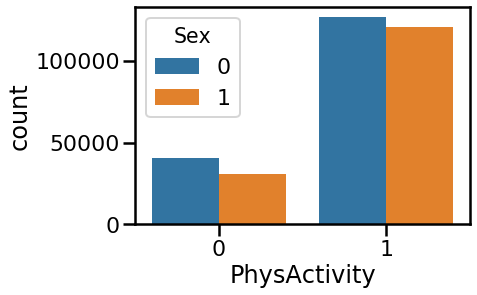

In [160]:
sns.countplot(x='PhysActivity', data=brfss_ml_2020, hue='Sex')

## Physical / HDA

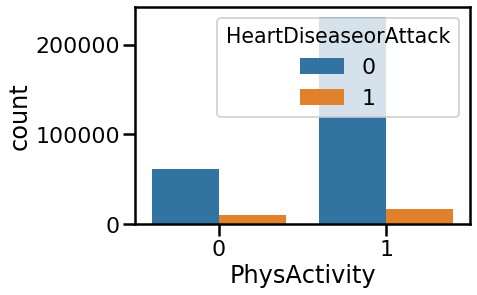

In [161]:
sns.countplot(x='PhysActivity', data=brfss_ml_2020, hue='HeartDiseaseorAttack')

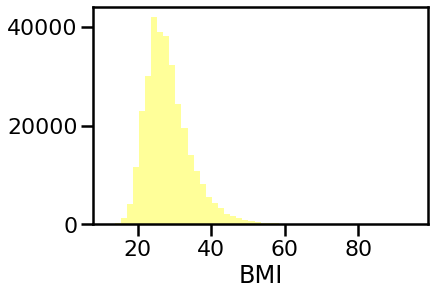

In [162]:
sns.distplot(brfss_ml_2020['BMI'], kde=False, color ='Yellow')

## General Health

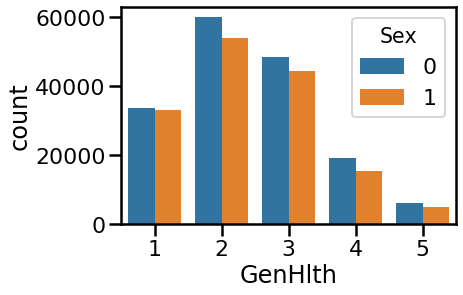

In [172]:
sns.countplot(x='GenHlth', data=brfss_ml_2020, hue='Sex')

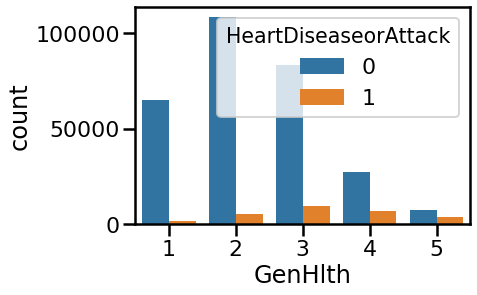

In [173]:
sns.countplot(x='GenHlth', data=brfss_ml_2020, hue='HeartDiseaseorAttack')

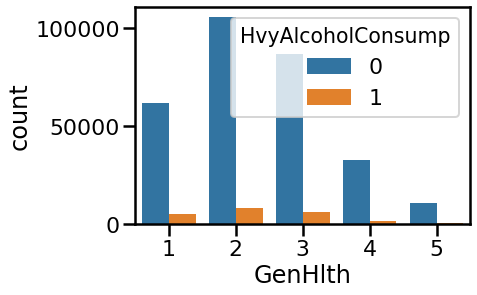

In [174]:
sns.countplot(x='GenHlth', data=brfss_ml_2020, hue='HvyAlcoholConsump')

# Model Building V2

In [175]:
X = brfss_ml_2020.drop(columns =['HeartDiseaseorAttack'], axis = 1)
Y = brfss_ml_2020['HeartDiseaseorAttack']

In [176]:
X_train, x_test, y_train, y_test = train_test_split(X,Y,shuffle = True, test_size = .2, random_state = 42 )
y_train.value_counts()

0    234055
1     21781
Name: HeartDiseaseorAttack, dtype: int64

In [177]:
ros = RandomOverSampler(random_state = 42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train , y_train)
y_train_resampled.value_counts()

1    234055
0    234055
Name: HeartDiseaseorAttack, dtype: int64

# Bernouli

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     58367
           1       0.19      0.62      0.30      5592

    accuracy                           0.74     63959
   macro avg       0.57      0.69      0.57     63959
weighted avg       0.89      0.74      0.79     63959



D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


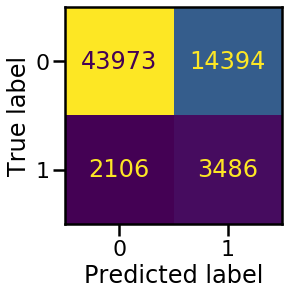

In [178]:
model_0 = BernoulliNB()
model_0.fit(X_train_resampled,y_train_resampled)
pred_0 = model_0.predict(x_test)
print(classification_report(y_test,pred_0))
cm = confusion_matrix(y_test,pred_0)
sns.set_context("poster") 
dispo = plot_confusion_matrix(model_0, x_test, y_test, colorbar= False)

# Gaussian



              precision    recall  f1-score   support

           0       0.96      0.80      0.87     58367
           1       0.23      0.61      0.33      5592

    accuracy                           0.79     63959
   macro avg       0.59      0.71      0.60     63959
weighted avg       0.89      0.79      0.83     63959



D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


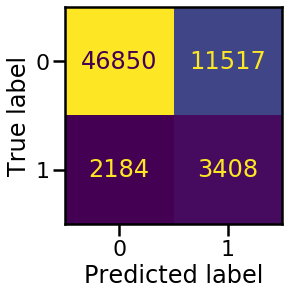

In [187]:
model_1 = GaussianNB()
model_1.fit(X_train_resampled,y_train_resampled)
pred_1 = model_1.predict(x_test)
print(classification_report(y_test,pred_1))
cm = confusion_matrix(y_test,pred_1)
sns.set_context ("poster") 
dispo = plot_confusion_matrix(model_1, x_test , y_test, colorbar= False)

# Random Forest

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     58367
           1       0.23      0.27      0.25      5592

    accuracy                           0.86     63959
   macro avg       0.58      0.59      0.58     63959
weighted avg       0.87      0.86      0.86     63959



D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


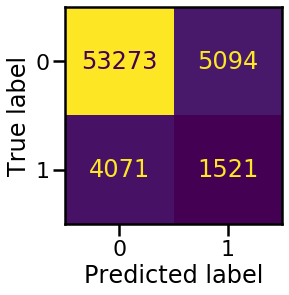

In [180]:
rf=RandomForestClassifier( n_estimators = 9 )
rf.fit(X_train_resampled , y_train_resampled)
y_pred_3 = rf.predict(x_test)
print(classification_report(y_test,y_pred_3))
from sklearn.metrics import  plot_confusion_matrix
sns.set_context ("poster") 
dispo = plot_confusion_matrix(rf, x_test , y_test, colorbar= False)

# Voting

BernoulliNB 0.6233905579399142
RandomForestClassifier 0.2550071530758226
GaussianNB 0.6094420600858369
VotingClassifier 0.5727825464949928
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     58367
           1       0.24      0.57      0.33      5592

    accuracy                           0.80     63959
   macro avg       0.59      0.70      0.61     63959
weighted avg       0.89      0.80      0.83     63959



D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


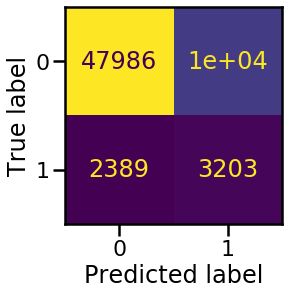

In [188]:
ber_clf = BernoulliNB()
rnd_clf = RandomForestClassifier()
gss_clf = GaussianNB()
voting_clf = VotingClassifier(
estimators=[('Bernoulli', ber_clf), ('rf', rnd_clf), ('gss', gss_clf)],
voting='hard')
voting_clf.fit(X_train_resampled,y_train_resampled)

for clf in (ber_clf, rnd_clf, gss_clf, voting_clf):
    clf.fit(X_train_resampled,y_train_resampled)
    y_pred_4 = clf.predict(x_test)
    print(clf.__class__.__name__, recall_score(y_test, y_pred_4))
print(classification_report(y_test,y_pred_4))
sns.set_context ("poster") 
dispo = plot_confusion_matrix(voting_clf, x_test, y_test, colorbar= False)

# Bagging

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     58367
           1       0.21      0.80      0.34      5592

    accuracy                           0.72     63959
   macro avg       0.59      0.76      0.58     63959
weighted avg       0.91      0.72      0.78     63959



D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


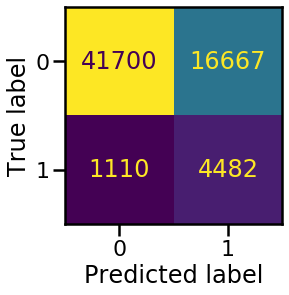

In [182]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=150, bootstrap=False, n_jobs=-1)
bag_clf.fit(X_train_resampled,y_train_resampled)
y_pred_5 = bag_clf.predict(x_test)
print(classification_report(y_test,y_pred_5))
sns.set_context ("poster") 
dispo = plot_confusion_matrix(bag_clf, x_test , y_test, colorbar= False)

# XGBoost classifier

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     58367
           1       0.21      0.79      0.34      5592

    accuracy                           0.73     63959
   macro avg       0.59      0.76      0.58     63959
weighted avg       0.91      0.73      0.79     63959



D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


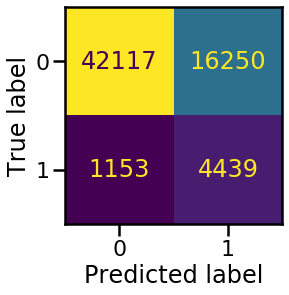

In [183]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':9
        }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(X_train_resampled,y_train_resampled)
y_pred_6 = xgb_clf.predict(x_test)
print(classification_report(y_test,y_pred_6))
sns.set_context ("poster") 
dispo = plot_confusion_matrix(xgb_clf, x_test, y_test, colorbar= False)

# Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58367
           1       0.22      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


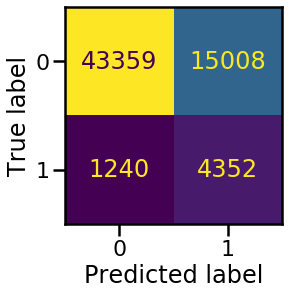

In [184]:
LR=LogisticRegression(max_iter=10000)
LR.fit(X_train_resampled, y_train_resampled)
y_pred_6 = LR.predict(x_test)
print(classification_report(y_test,y_pred_6))
sns.set_context ("poster") 
dispo = plot_confusion_matrix(LR, x_test, y_test, colorbar= False)